In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# visulization style setup
plt.style.use("tableau-colorblind10")
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('grid', ls='-.', c='0A043C', alpha=0.2)
plt.rc('axes', labelsize=12, titlesize=14)

In [5]:
with open('/content/House_Rent_Dataset.csv') as f:
  data=f.read()

In [9]:
house_df = pd.read_csv("/content/House_Rent_Dataset.csv")
print(f"Shape of dataset::{house_df.shape}")

Shape of dataset::(4746, 12)


In [10]:
house_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [11]:
house_df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [13]:
# Renaming column names
house_df.rename(columns={'Posted On': 'datetime',
                        'BHK':'number_of_bedroom',
                        'Rent':'price',
                        'Size':'size_in_sqft',
                        'Area Type':'area_type',
                        'City':'city',
                        'Furnishing Status':'furnishing',
                        'Tenant Preferred':'tenant_preferred',
                        'Bathroom':'number_of_bathroom',
                        }, inplace=True)

In [14]:
# date time conversion.
house_df['datetime'] = pd.to_datetime(house_df.datetime)

# categorical variables
house_df['tenant_preferred'] = house_df['tenant_preferred'].astype('category')
house_df['furnishing'] = house_df['furnishing'].astype('category')


In [15]:
# Let's create the new attributes `month` from 'datetime' and convert into `category` type for proper understanding.

house_df['month'] = house_df['datetime'].dt.month.astype('category')

In [16]:
# Let's create the attribute 'floor' and 'total_floors' from the column Floor.
def get_floor_num(x):
    if len(x.split(' ')) == 4:
        value = x.split(' ')[0].strip()
        if value == 'Ground':
            return 0
        return value
    
def get_num_of_floors(x):
    if len(x.split(' ')) >= 4:
        return x.split(' ')[-1]
    else:
        return np.nan
    
house_df['floor'] = house_df['Floor'].apply(lambda x: get_floor_num(x))
house_df['total_floors'] = house_df['Floor'].apply(lambda x: get_num_of_floors(x))

In [17]:
# Let's compute the price per sqft.
house_df['price_per_sqft'] = np.round(house_df['price'] / house_df['size_in_sqft'])

In [18]:
# Let's view dataframe with new columns.
house_df.head()

,datetime,number_of_bedroom,price,size_in_sqft,Floor,area_type,Area Locality,city,furnishing,tenant_preferred,number_of_bathroom,Point of Contact,month,floor,total_floors,price_per_sqft
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,0,2,9.0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,1,3,25.0
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,1,3,17.0
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,1,2,12.0
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,1,2,9.0


In [19]:
# Basic Data Analysis.
class BasicAnalysis:
    
    def __init__(self, data):
        self.data = data
    
    def analysis(self):
        column_list = self.data.columns.to_list()
        print("Name of columns::", column_list)
        print()
        
        columns_with_missing_data = self.data.columns[self.data.isnull().any()].tolist()
        print("Columns with Missing Data::", columns_with_missing_data)
        print()
        
        number_of_duplicates = self.data.duplicated().sum()
        print("Number of duplicates::", number_of_duplicates)
        print()
        
        general_stats = self.data.describe()
        print("General Statistics::\n", general_stats)
        print()

        summary_stats = self.data.info
        print("Summary Statistics::\n", summary_stats)

In [20]:
obj = BasicAnalysis(house_df)
obj.analysis()

Name of columns:: ['datetime', 'number_of_bedroom', 'price', 'size_in_sqft', 'Floor', 'area_type', 'Area Locality', 'city', 'furnishing', 'tenant_preferred', 'number_of_bathroom', 'Point of Contact', 'month', 'floor', 'total_floors', 'price_per_sqft']

Columns with Missing Data:: ['floor', 'total_floors']

Number of duplicates:: 0

General Statistics::
        number_of_bedroom         price  size_in_sqft  number_of_bathroom  \
count        4746.000000  4.746000e+03   4746.000000         4746.000000   
mean            2.083860  3.499345e+04    967.490729            1.965866   
std             0.832256  7.810641e+04    634.202328            0.884532   
min             1.000000  1.200000e+03     10.000000            1.000000   
25%             2.000000  1.000000e+04    550.000000            1.000000   
50%             2.000000  1.600000e+04    850.000000            2.000000   
75%             3.000000  3.300000e+04   1200.000000            2.000000   
max             6.000000  3.500000e+

In [21]:
# Drop the null values from the data.
house_df = house_df.dropna(axis=0)

In [22]:
# Type cast
house_df['floor'] = house_df['floor'].astype('int')
house_df['total_floors'] = house_df['total_floors'].astype('int')

**Distribution**


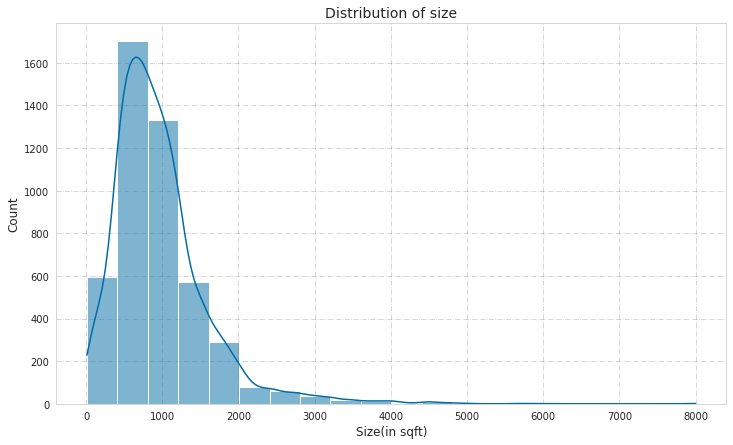

In [23]:
# Distribution of size of house
sns.histplot(data=house_df[['size_in_sqft']],
             x='size_in_sqft',
             bins=20, kde='True')
plt.title("Distribution of size")
plt.xlabel("Size(in sqft)")
plt.show()

Distribution of size is right skewed


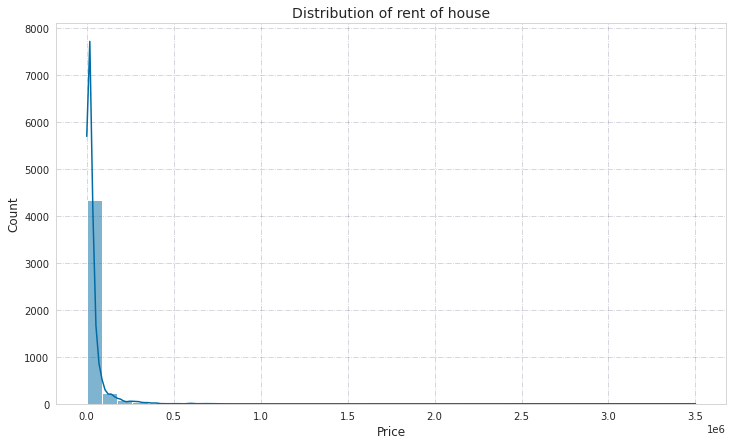

In [24]:
# Distribution of price.
sns.histplot(data=house_df[['price']],
             x='price', bins=40, kde='True')
plt.title("Distribution of rent of house")
plt.xlabel("Price")
plt.show()

The distriubution of rent of houses is right skewed. This might be result of high prices of houses with more number of bedrooms.

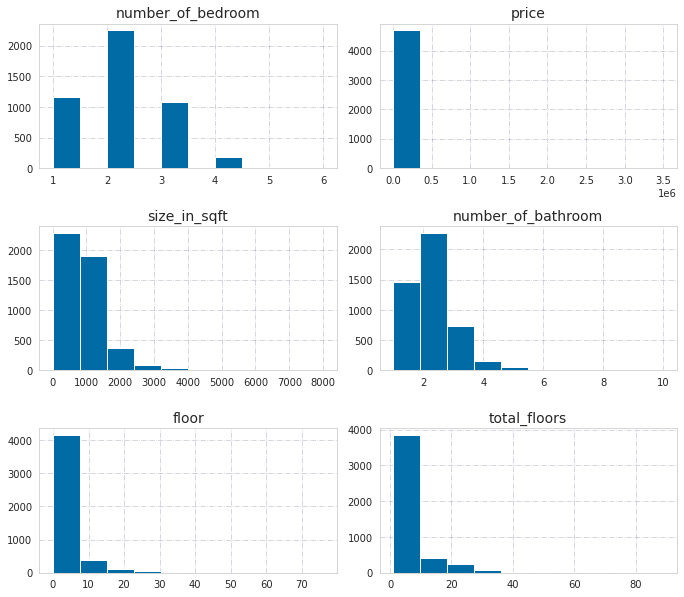

In [25]:
# Distribution of all numeric columns.
numeric_columns = house_df.select_dtypes(include='int').columns.tolist()
house_df[numeric_columns].hist(xlabelsize=10)
plt.tight_layout(rect=(0.2, 0, 1, 1.2))

Outliers

In [26]:
# Let's find the number of houses with highest rents.
house_df.loc[house_df.price == house_df.price.max()]

,datetime,number_of_bedroom,price,size_in_sqft,Floor,area_type,Area Locality,city,furnishing,tenant_preferred,number_of_bathroom,Point of Contact,month,floor,total_floors,price_per_sqft
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent,6,4,4,1400.0


In [27]:
# There is only single house with rent 3500000. Therefore remove it.
house_df = house_df.loc[house_df.price != house_df.price.max()]

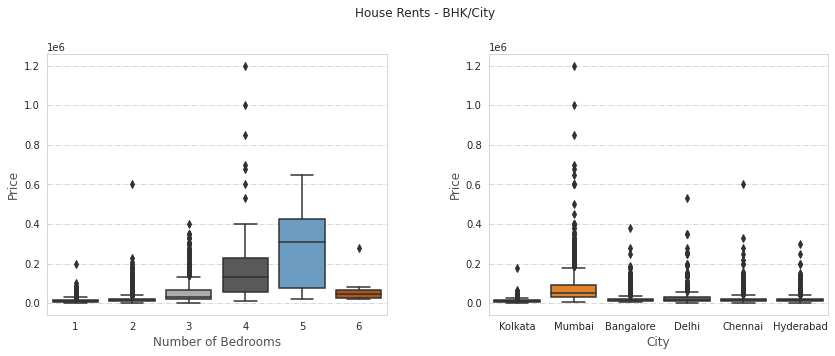

In [28]:
# Visualizating rent price based on number of bedrooms and city.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
f.suptitle("House Rents - BHK/City")
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x='number_of_bedroom', y='price',
            data=house_df, ax=ax1)
ax1.set_xlabel("Number of Bedrooms", size=12, alpha=0.8)
ax1.set_ylabel("Price", size=12, alpha=0.8)

sns.boxplot(x='city', y='price',
            data=house_df, ax=ax2)
ax2.set_xlabel("City", size=12, alpha=0.8)
ax2.set_ylabel("Price", size=12, alpha=0.8)
plt.show()

Corelation

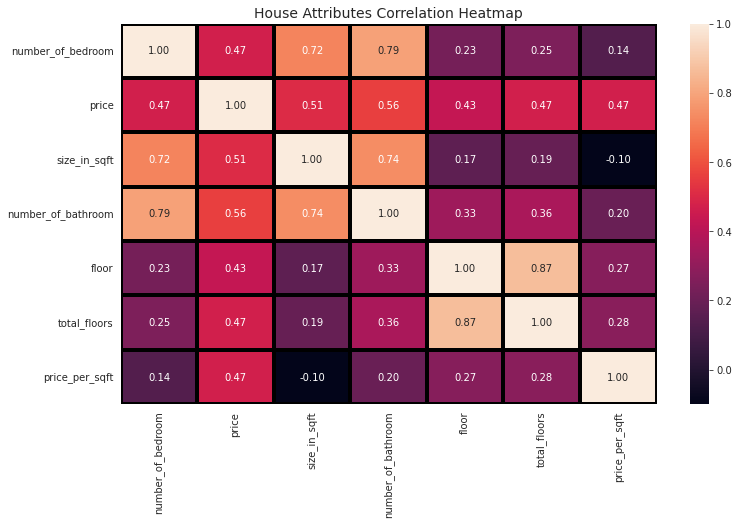

In [44]:
corr = house_df.corr()
sns.heatmap(round(corr,2), 
            annot=True, 
            fmt='.2f',
            square=False,
            linewidth=3,
            linecolor='#000')
plt.title("House Attributes Correlation Heatmap")
plt.show()

The size of house and number of bathroom and bedrooms have high correlation to the house rent among other attributes. There is also multi-collinearity observed in data. There is no such high correlation with price attribute.

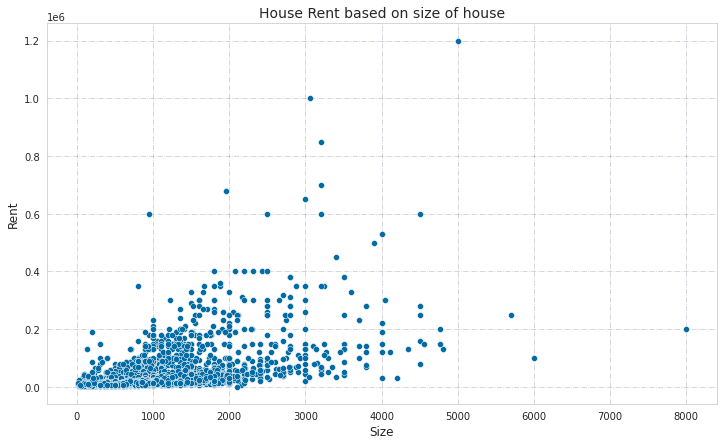

In [45]:
# Visualizing the price of house based on size.
sns.scatterplot(x='size_in_sqft', y='price',
             data=house_df)

plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("House Rent based on size of house")
plt.show()

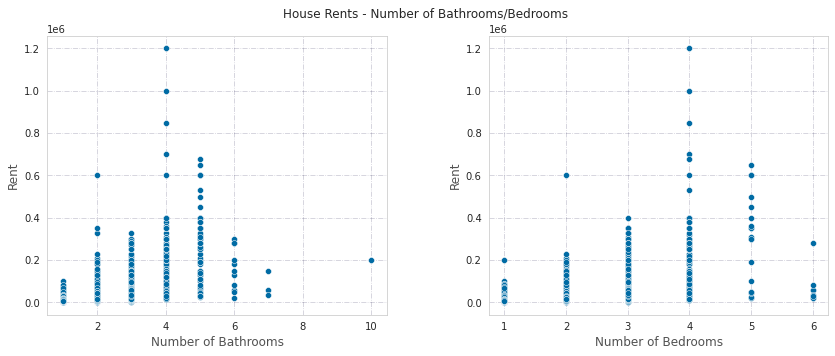

In [47]:
# Visualizing rent of house based on number of bathrooms and bedrooms.
s, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
s.suptitle("House Rents - Number of Bathrooms/Bedrooms")
s.subplots_adjust(top=0.90, wspace=0.3)

# plots
sns.scatterplot(x='number_of_bathroom', 
                y='price',
                data=house_df, ax=ax1)
ax1.set_xlabel("Number of Bathrooms", size=12, alpha=0.8)
ax1.set_ylabel("Rent", size=12, alpha=0.8)

sns.scatterplot(x='number_of_bedroom',
                y='price',
                data=house_df, ax=ax2)
ax2.set_xlabel("Number of Bedrooms", size=12, alpha=0.8)
ax2.set_ylabel("Rent", size=12, alpha=0.8)
plt.show()


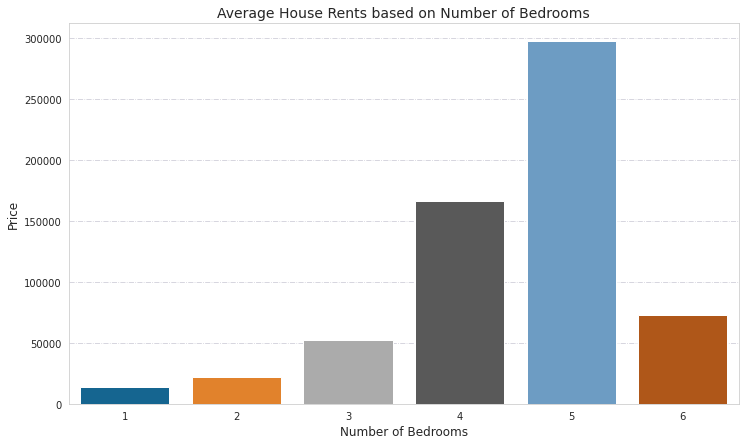

In [48]:
# Let's visualize the price of houses by number of bedrooms.
# Data prepration.
grp_data = house_df.groupby(by=['number_of_bedroom'])['price'].apply(np.mean).reset_index()

# plot
sns.barplot(data=grp_data,
            x='number_of_bedroom', 
            y='price')

plt.title("Average House Rents based on Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()

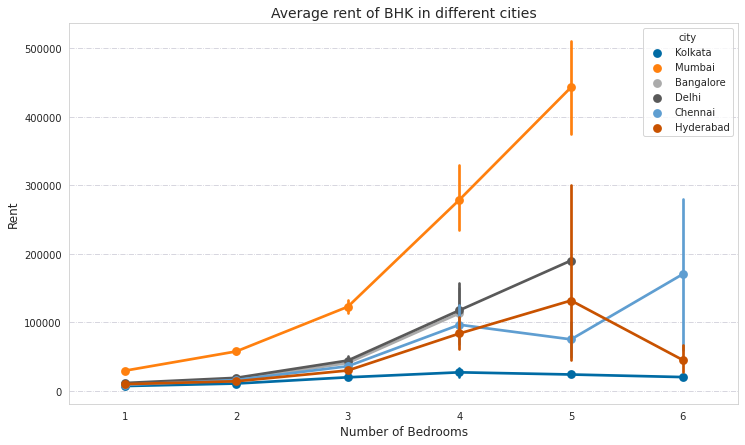

In [49]:
# Let's visualize the price of houses by number of bedrooms in different cities.
sns.pointplot(data=house_df[['number_of_bedroom', 
                             'city', 'price']],
              x='number_of_bedroom', y='price',
              hue='city',estimator=np.mean)

plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent")
plt.title("Average rent of BHK in different cities")
plt.show()

We can see that, the house rent increases as the number of bedrooms increases. Rent of house with 1BHK seems to have similar rates in all cities.

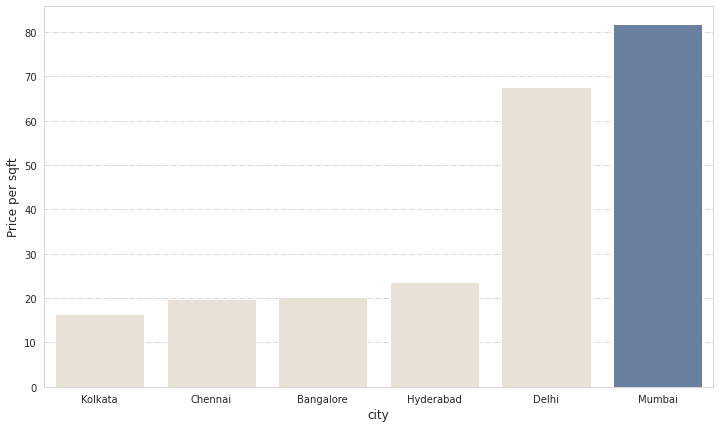

In [50]:
# Most expensive city.
grp_data = house_df.groupby(by=['city'])['price_per_sqft'].apply(np.mean).sort_values().reset_index()
sns.barplot(x='city', y='price_per_sqft',
           data=grp_data,
           palette=['#EAE3D2', '#EAE3D2', '#EAE3D2', '#EAE3D2', '#EAE3D2','#607EAA'])

plt.ylabel("Price per sqft")
plt.show()

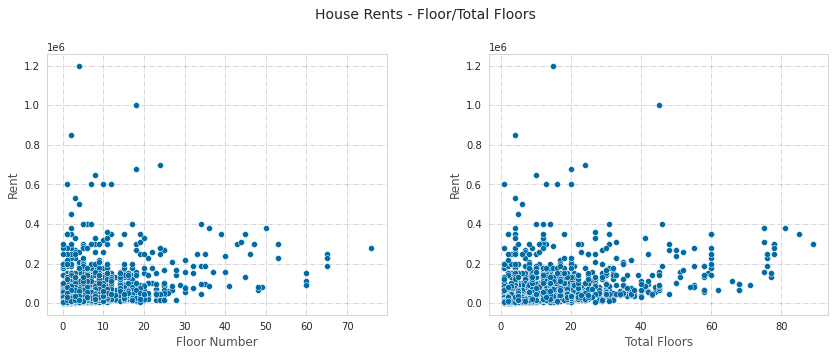

In [51]:
# Visualizing rent of house based on floor.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
f.suptitle("House Rents - Floor/Total Floors", size=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# scatter plot of floor
sns.scatterplot(x='floor', y='price',
                data=house_df, ax=ax1)
ax1.set_xlabel("Floor Number", size=12, alpha=0.8)
ax1.set_ylabel("Rent", size=12, alpha=0.8)

# scatter plot of total_floors
sns.scatterplot(x='total_floors', y='price',
              data=house_df, ax=ax2)
ax2.set_xlabel("Total Floors", size=12, alpha=0.8)
ax2.set_ylabel("Rent", size=12, alpha=0.8)

plt.show()

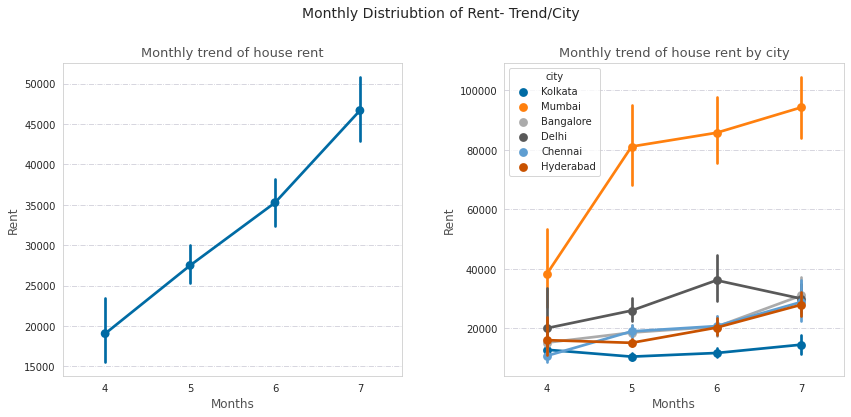

In [52]:
# Monthly distribution of rents.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
f.suptitle("Monthly Distriubtion of Rent- Trend/City", size=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.pointplot(x='month', y='price', 
              data=house_df, ax=ax1)
ax1.set_xlabel("Months", size=12, alpha=0.8)
ax1.set_ylabel("Rent", size=12, alpha=0.8)
ax1.set_title("Monthly trend of house rent", size=13, alpha=0.8)

sns.pointplot(x='month', y='price', 
              data=house_df, hue='city', ax=ax2)
ax2.set_xlabel("Months", size=12, alpha=0.8)
ax2.set_ylabel("Rent", size=12, alpha=0.8)
ax2.set_title("Monthly trend of house rent by city", size=13, alpha=0.8)

plt.show()

There is overall increasing trend observed in rent prices over months in every city.



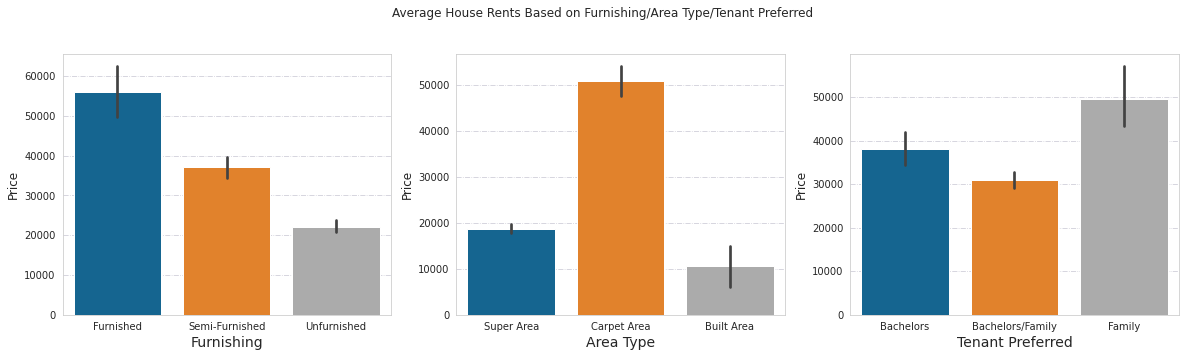

In [53]:
# Visualize the prices of house based Furnishing/Area Type/Tenant Preferred.

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
f.suptitle("Average House Rents Based on Furnishing/Area Type/Tenant Preferred")
f.subplots_adjust(top=0.85, wspace=0.2)

# Furnishing
sns.barplot(data=house_df,
            x='furnishing', y='price',
            estimator=np.mean, ax=ax1)
ax1.set_xlabel("Furnishing", size=14)
ax1.set_ylabel("Price")

# Area type
sns.barplot(data=house_df,
            x='area_type', y='price',
            estimator=np.mean, ax=ax2)
ax2.set_xlabel("Area Type", size=14)
ax2.set_ylabel("Price")

# Tennat Preferred
sns.barplot(data=house_df,
            x='tenant_preferred', y='price',
            estimator=np.mean, ax=ax3)
ax3.set_xlabel("Tenant Preferred", size=14)
ax3.set_ylabel("Price")
plt.show()


## **Data** **Preprocessing**

In [54]:
# The distribution of size is right skewed. 
# Let's perform the log transformation on those attriubtes to make distribution normal.
house_df['size_in_sqft'] = np.log(house_df['size_in_sqft'])

In [55]:
# split the data into X and y
feature_columns = ['number_of_bedroom',
                   'number_of_bathroom',
                   'size_in_sqft', 
                   'area_type', 
                   'city', 
                   'furnishing', 
                   'tenant_preferred', 
                   'month',
                   'floor',
                   'total_floors']

X = house_df[feature_columns].reset_index(drop=True)
y = house_df['price'].reset_index(drop=True)

In [56]:
# Scale the numeric data.
num_df = X.select_dtypes(include=np.number)

scaler = StandardScaler()
num_df_transform = scaler.fit_transform(num_df)
num_df_transform = pd.DataFrame(num_df_transform, index=num_df.index, columns=num_df.columns)

In [57]:
# Perform One hot encoding to convert categorical data into numerical.
categorical_columns = ['area_type', 'city', 'furnishing', 'month']
OH_X = pd.get_dummies(columns=categorical_columns, data=X[categorical_columns])

# Let's clean the column names
def rename_columns(df, rename_dict={}, do_inplace=True):
    return df.rename(columns={col: col.lower().replace(" ", "_") for col in df.columns.tolist()}, inplace=do_inplace)

rename_columns(OH_X)

In [58]:
# combine the transform data.
X_transform = pd.concat([num_df_transform, OH_X], axis=1)

In [59]:
# split the data into training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3, random_state=42)

## **Model Evaluation**

Linear Regression

In [60]:
# Model building - Linear Regression
lin_reg = LinearRegression()

# fit the data
lin_reg.fit(X_train, y_train)

# predict the output
y_predicts = lin_reg.predict(X_test)

# Accuracy Score
print("Test Accuracy Score:: %.2f" %(r2_score(y_test, y_predicts)*100))

Test Accuracy Score:: 57.60


In [61]:
# Let's evaluate the performance of model using k-fold cross validation.
# here, we use 10-fold cross validation. 
# The `cross_val_predict` function return cross validated prediction values by the model.

predicted = cross_val_predict(lin_reg, X_transform, y, cv=10, n_jobs=-1)
residual = y - predicted

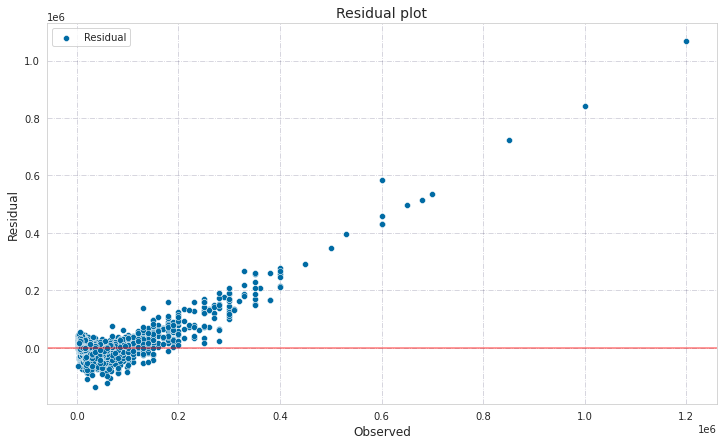

In [62]:
# Analyze the predictions using residual plot
sns.scatterplot(x=y, y=residual, label='Residual')
plt.axhline(lw=2, color='red', alpha=0.4)
plt.xlabel("Observed")
plt.ylabel("Residual")
plt.title("Residual plot")
plt.show()

Residual plot shows that, the residual are not random and follows the linear pattern. Which means that it violets the one of the assumption of linear regression that is Homoscedasticity. Let's further evaluate the Linear Model plotting cross validation scores.

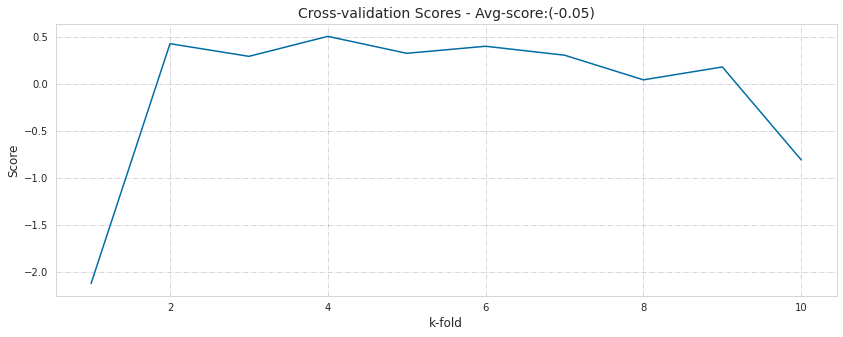

In [63]:
# cross-validations scores
scores = cross_val_score(lin_reg, X_transform, y, cv=10, scoring='r2', n_jobs=-1)
kfolds = list(range(1, 11))

# plots
plt.figure(figsize=(14, 5))
sns.lineplot(x=kfolds, y=scores)
plt.xlabel("k-fold")
plt.ylabel("Score")
plt.title("Cross-validation Scores - Avg-score:(%.2f)" %(np.mean(scores)))
plt.show()

The r-squared or coefficient of determination is -0.05 on average for 10-fold cross validation. The model does not perform well and unable to generalized the results.

The distribution of price is right skewed and this might be the reason why the linear regression model is unable to model the data.

In [64]:
# Let's perform the log transformation on `y` data to make distribution normal.
y_transform = np.log(y)

# split the data into training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)

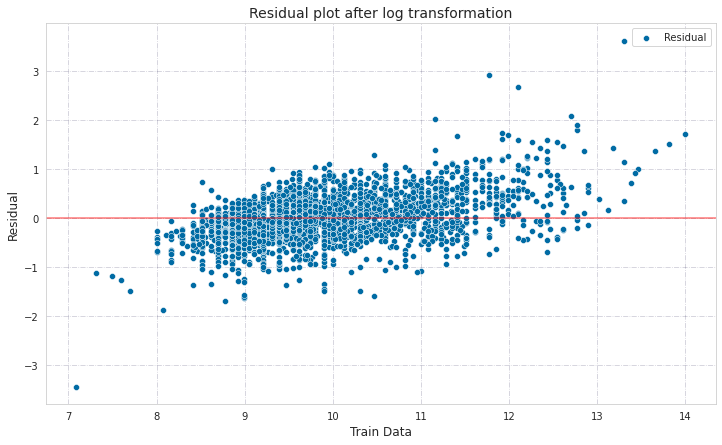

In [65]:
# Let's evaluate the results again of training data using k-fold cross-validation.
predicted = cross_val_predict(lin_reg, X_train, y_train, cv=10, n_jobs=-1)
residual = y_train - predicted

# Residual plot
sns.scatterplot(x=y_train, y=residual, label='Residual')
plt.axhline(lw=2, color='red', alpha=0.4)
plt.xlabel("Train Data")
plt.ylabel("Residual")
plt.title("Residual plot after log transformation")
plt.show()

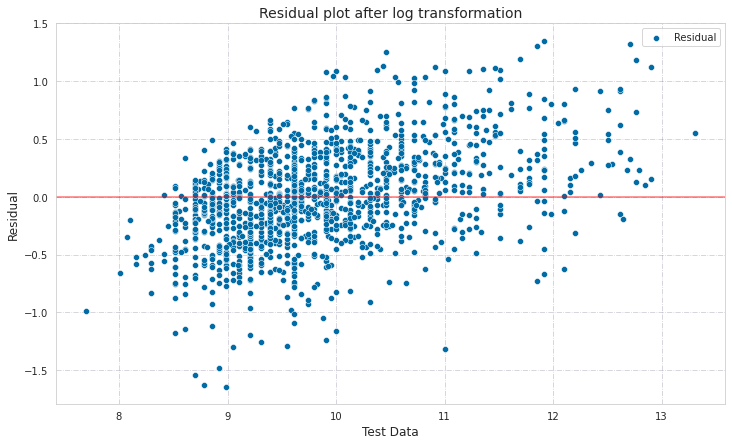

In [66]:
# fit the data
lin_reg.fit(X_train, y_train)
y_preds = lin_reg.predict(X_test)

# residual plot for test data.
sns.scatterplot(x=y_test, y=y_test-y_preds, label='Residual')
plt.axhline(lw=2, color='red', alpha=0.4)
plt.xlabel("Test Data")
plt.ylabel("Residual")
plt.title("Residual plot after log transformation")
plt.show()

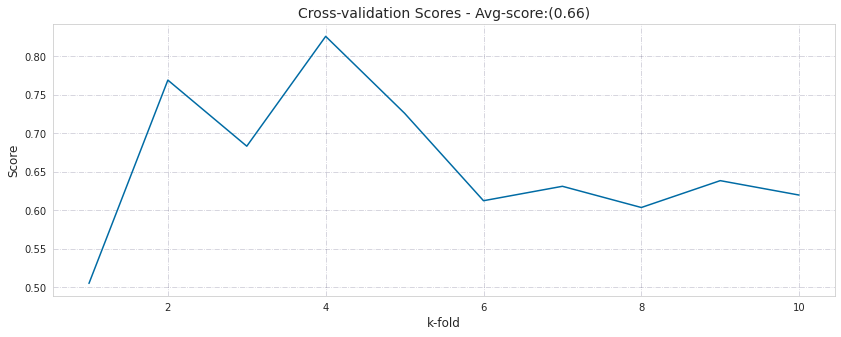

In [67]:
# cross-validations scores
scores = cross_val_score(lin_reg, X_transform, y_transform, cv=10, scoring='r2', n_jobs=-1)
kfolds = list(range(1, 11))

# plots
plt.figure(figsize=(14, 5))
sns.lineplot(x=kfolds, y=scores)
plt.xlabel("k-fold")
plt.ylabel("Score")
plt.title("Cross-validation Scores - Avg-score:(%.2f)" %(np.mean(scores)))
plt.show()

The accuracy of linear regression model has improved to 66% after taking log transformation of response variable.


